In [ ]:
import numpy as np
import pickle
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [ ]:
# loading audio files that are stored in pickle form in Google Drive

# 0 linguistic family -> Greek
with open('/content/drive/MyDrive/audio/el_npy.pickle', 'rb') as file:
    size = 1000
    X = np.array(pickle.load(file)[:size])
    y = np.zeros(size-1)

# 1 linguistic family -> Spanish, French
size = 500
with open('/content/drive/MyDrive/audio/fr_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 1))

with open('/content/drive/MyDrive/audio/es_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 1))

# 2 linguistic family -> English, Swedish, Norwegian, German, Dutch
size = 200
with open('/content/drive/MyDrive/audio/nl_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 2))

with open('/content/drive/MyDrive/audio/no_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 2))

with open('/content/drive/MyDrive/audio/sv_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 2))

with open('/content/drive/MyDrive/audio/de_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 2))

with open('/content/drive/MyDrive/audio/en_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:size], axis=0)
    y = np.append(y, np.full(size, 2))

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(2999, 1000, 40)
(2999,)


In [ ]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X=[]
y=[]

In [ ]:
model = Sequential()
model.add(Conv2D(32,(7, 7), activation='relu', padding='valid', input_shape=(1000,40,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(64,(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 994, 34, 32)       1600      
                                                                 
 batch_normalization (BatchN  (None, 994, 34, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 497, 17, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 497, 17, 64)       51264     
                                                                 
 batch_normalization_1 (Batc  (None, 497, 17, 64)      256       
 hNormalization)                                                 
                                                        

In [ ]:
import math
from keras.callbacks import LearningRateScheduler
adam = Adam()
def step_decay(epoch):
	initial_lrate = 0.00158
	drop = 0.9
	epochs_drop = 1
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=adam,metrics=['accuracy'])



checkpoint = ModelCheckpoint(
                'model.h5',
                monitor='val_acc',
                verbose=0,
                save_best_only=True,
                mode='max'
                )

lrate = LearningRateScheduler(step_decay)
es = EarlyStopping(monitor='val_loss',mode = 'max', patience=3)
model.fit(
                X_train,
                y_train,
                epochs=60,
                callbacks=[checkpoint, lrate],
                verbose=1,
                validation_data=(X_test, y_test),
                batch_size=16)



Epoch 1/60


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - ETA: 0s - loss: 1.6707 - accuracy: 0.3461

169/169 [==============================] - 18s 49ms/step - loss: 1.6707 - accuracy: 0.3461 - val_loss: 1.3085 - val_accuracy: 0.3600 - lr: 0.0014
Epoch 2/60
169/169 [==============================] - ETA: 0s - loss: 1.3160 - accuracy: 0.3938

169/169 [==============================] - 6s 38ms/step - loss: 1.3160 - accuracy: 0.3938 - val_loss: 1.1658 - val_accuracy: 0.4000 - lr: 0.0013
Epoch 3/60
169/169 [==============================] - ETA: 0s - loss: 1.1478 - accuracy: 0.4579

169/169 [==============================] - 6s 37ms/step - loss: 1.1478 - accuracy: 0.4579 - val_loss: 1.2132 - val_accuracy: 0.4000 - lr: 0.0012
Epoch 4/60
169/169 [==============================] - ETA: 0s - loss: 1.0164 - accuracy: 0.5287

169/169 [==============================] - 6s 37ms/step - loss: 1.0164 - accuracy: 0.5287 - val_loss: 1.8018 - val_accuracy: 0.3933 - lr: 0.0010
Epoch 5/60
169/169 [==============================] - ETA: 0s - loss: 0.8847 - accuracy: 0.6054

169/169 [==============================] - 6s 38ms/step - loss: 0.8847 - accuracy: 0.6054 - val_loss: 2.3275 - val_accuracy: 0.3500 - lr: 9.3297e-04
Epoch 6/60
169/169 [==============================] - ETA: 0s - loss: 0.7792 - accuracy: 0.6706

169/169 [==============================] - 6s 38ms/step - loss: 0.7792 - accuracy: 0.6706 - val_loss: 1.3567 - val_accuracy: 0.3900 - lr: 8.3968e-04
Epoch 7/60
169/169 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.7203

169/169 [==============================] - 6s 38ms/step - loss: 0.6761 - accuracy: 0.7203 - val_loss: 1.3980 - val_accuracy: 0.4433 - lr: 7.5571e-04
Epoch 8/60
169/169 [==============================] - ETA: 0s - loss: 0.5652 - accuracy: 0.7647

169/169 [==============================] - 7s 39ms/step - loss: 0.5652 - accuracy: 0.7647 - val_loss: 3.4407 - val_accuracy: 0.3533 - lr: 6.8014e-04
Epoch 9/60
169/169 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.8033

169/169 [==============================] - 6s 38ms/step - loss: 0.4848 - accuracy: 0.8033 - val_loss: 1.5873 - val_accuracy: 0.5100 - lr: 6.1212e-04
Epoch 10/60
169/169 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8555

169/169 [==============================] - 6s 38ms/step - loss: 0.3630 - accuracy: 0.8555 - val_loss: 1.3111 - val_accuracy: 0.5033 - lr: 5.5091e-04
Epoch 11/60
169/169 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.8892

169/169 [==============================] - 6s 38ms/step - loss: 0.2954 - accuracy: 0.8892 - val_loss: 0.8188 - val_accuracy: 0.6467 - lr: 4.9582e-04
Epoch 12/60
169/169 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9170

169/169 [==============================] - 7s 39ms/step - loss: 0.2269 - accuracy: 0.9170 - val_loss: 1.2822 - val_accuracy: 0.5600 - lr: 4.4624e-04
Epoch 13/60
169/169 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9441

169/169 [==============================] - 6s 38ms/step - loss: 0.1628 - accuracy: 0.9441 - val_loss: 0.8517 - val_accuracy: 0.6867 - lr: 4.0161e-04
Epoch 14/60
169/169 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9611

169/169 [==============================] - 7s 39ms/step - loss: 0.1133 - accuracy: 0.9611 - val_loss: 0.8405 - val_accuracy: 0.7167 - lr: 3.6145e-04
Epoch 15/60
169/169 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9637

169/169 [==============================] - 6s 38ms/step - loss: 0.1076 - accuracy: 0.9637 - val_loss: 0.9559 - val_accuracy: 0.6900 - lr: 3.2531e-04
Epoch 16/60
169/169 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9774

169/169 [==============================] - 7s 39ms/step - loss: 0.0710 - accuracy: 0.9774 - val_loss: 1.0400 - val_accuracy: 0.7167 - lr: 2.9278e-04
Epoch 17/60
169/169 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9737

169/169 [==============================] - 6s 38ms/step - loss: 0.0752 - accuracy: 0.9737 - val_loss: 1.2075 - val_accuracy: 0.7000 - lr: 2.6350e-04
Epoch 18/60
169/169 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9781

169/169 [==============================] - 7s 40ms/step - loss: 0.0649 - accuracy: 0.9781 - val_loss: 0.8925 - val_accuracy: 0.7367 - lr: 2.3715e-04
Epoch 19/60
169/169 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9896

169/169 [==============================] - 7s 39ms/step - loss: 0.0420 - accuracy: 0.9896 - val_loss: 0.7973 - val_accuracy: 0.7467 - lr: 2.1343e-04
Epoch 20/60
169/169 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9885

169/169 [==============================] - 7s 40ms/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 1.1347 - val_accuracy: 0.6733 - lr: 1.9209e-04
Epoch 21/60
169/169 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9889

169/169 [==============================] - 6s 38ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.8975 - val_accuracy: 0.7467 - lr: 1.7288e-04
Epoch 22/60
169/169 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9937

169/169 [==============================] - 7s 39ms/step - loss: 0.0309 - accuracy: 0.9937 - val_loss: 1.1927 - val_accuracy: 0.7400 - lr: 1.5559e-04
Epoch 23/60
169/169 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9922

169/169 [==============================] - 6s 38ms/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.8198 - val_accuracy: 0.7767 - lr: 1.4003e-04
Epoch 24/60
169/169 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9937

169/169 [==============================] - 7s 40ms/step - loss: 0.0263 - accuracy: 0.9937 - val_loss: 0.8872 - val_accuracy: 0.7200 - lr: 1.2603e-04
Epoch 25/60
169/169 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9948

169/169 [==============================] - 7s 39ms/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.8016 - val_accuracy: 0.7733 - lr: 1.1343e-04
Epoch 26/60
169/169 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9933

169/169 [==============================] - 7s 39ms/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.8987 - val_accuracy: 0.7733 - lr: 1.0209e-04
Epoch 27/60
169/169 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9970

169/169 [==============================] - 6s 38ms/step - loss: 0.0147 - accuracy: 0.9970 - val_loss: 0.7760 - val_accuracy: 0.7633 - lr: 9.1877e-05
Epoch 28/60
169/169 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0136 - accuracy: 0.9978 - val_loss: 0.8613 - val_accuracy: 0.7533 - lr: 8.2689e-05
Epoch 29/60
169/169 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9937

169/169 [==============================] - 7s 39ms/step - loss: 0.0222 - accuracy: 0.9937 - val_loss: 0.9441 - val_accuracy: 0.7567 - lr: 7.4420e-05
Epoch 30/60
169/169 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0121 - accuracy: 0.9978 - val_loss: 0.7581 - val_accuracy: 0.8033 - lr: 6.6978e-05
Epoch 31/60
169/169 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9956

169/169 [==============================] - 6s 38ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.7808 - val_accuracy: 0.7833 - lr: 6.0280e-05
Epoch 32/60
169/169 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9963

169/169 [==============================] - 7s 39ms/step - loss: 0.0148 - accuracy: 0.9963 - val_loss: 0.7520 - val_accuracy: 0.8167 - lr: 5.4252e-05
Epoch 33/60
169/169 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9970

169/169 [==============================] - 6s 38ms/step - loss: 0.0153 - accuracy: 0.9970 - val_loss: 0.8102 - val_accuracy: 0.7833 - lr: 4.8827e-05
Epoch 34/60
169/169 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9981

169/169 [==============================] - 7s 39ms/step - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.8179 - val_accuracy: 0.7800 - lr: 4.3944e-05
Epoch 35/60
169/169 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9978

169/169 [==============================] - 6s 38ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 0.8104 - val_accuracy: 0.7633 - lr: 3.9550e-05
Epoch 36/60
169/169 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9989

169/169 [==============================] - 7s 39ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.8130 - val_accuracy: 0.7800 - lr: 3.5595e-05
Epoch 37/60
169/169 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9985

169/169 [==============================] - 6s 38ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.7977 - val_accuracy: 0.8067 - lr: 3.2035e-05
Epoch 38/60
169/169 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9974

169/169 [==============================] - 7s 41ms/step - loss: 0.0118 - accuracy: 0.9974 - val_loss: 0.8404 - val_accuracy: 0.7800 - lr: 2.8832e-05
Epoch 39/60
169/169 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9981

169/169 [==============================] - 7s 39ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.7940 - val_accuracy: 0.8100 - lr: 2.5949e-05
Epoch 40/60
169/169 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.8036 - val_accuracy: 0.8033 - lr: 2.3354e-05
Epoch 41/60
169/169 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.8386 - val_accuracy: 0.7900 - lr: 2.1018e-05
Epoch 42/60
168/169 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9985

169/169 [==============================] - 7s 39ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.8008 - val_accuracy: 0.7767 - lr: 1.8917e-05
Epoch 43/60
169/169 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9993

169/169 [==============================] - 7s 39ms/step - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.8058 - val_accuracy: 0.8000 - lr: 1.7025e-05
Epoch 44/60
169/169 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9993

169/169 [==============================] - 7s 39ms/step - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.8313 - val_accuracy: 0.7833 - lr: 1.5322e-05
Epoch 45/60
169/169 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9996

169/169 [==============================] - 6s 38ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.7866 - val_accuracy: 0.7967 - lr: 1.3790e-05
Epoch 46/60
169/169 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.7969 - val_accuracy: 0.8067 - lr: 1.2411e-05
Epoch 47/60
169/169 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9996

169/169 [==============================] - 6s 38ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.8003 - val_accuracy: 0.8067 - lr: 1.1170e-05
Epoch 48/60
169/169 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.7774 - val_accuracy: 0.8067 - lr: 1.0053e-05
Epoch 49/60
169/169 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9996

169/169 [==============================] - 7s 39ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.7709 - val_accuracy: 0.8067 - lr: 9.0477e-06
Epoch 50/60
169/169 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9989

169/169 [==============================] - 7s 39ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.7724 - val_accuracy: 0.7967 - lr: 8.1430e-06
Epoch 51/60
169/169 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9985

169/169 [==============================] - 6s 38ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.7720 - val_accuracy: 0.8033 - lr: 7.3287e-06
Epoch 52/60
169/169 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9985

169/169 [==============================] - 7s 39ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.7991 - val_accuracy: 0.8067 - lr: 6.5958e-06
Epoch 53/60
169/169 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9967

169/169 [==============================] - 7s 39ms/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.7998 - val_accuracy: 0.7967 - lr: 5.9362e-06
Epoch 54/60
169/169 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9978

169/169 [==============================] - 7s 39ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.7963 - val_accuracy: 0.7967 - lr: 5.3426e-06
Epoch 55/60
169/169 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9996

169/169 [==============================] - 7s 39ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.7793 - val_accuracy: 0.8033 - lr: 4.8083e-06
Epoch 56/60
169/169 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9989

169/169 [==============================] - 7s 39ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.8042 - val_accuracy: 0.7967 - lr: 4.3275e-06
Epoch 57/60
169/169 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9996

169/169 [==============================] - 7s 39ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.7623 - val_accuracy: 0.8067 - lr: 3.8948e-06
Epoch 58/60
169/169 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9985

169/169 [==============================] - 7s 39ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.7683 - val_accuracy: 0.8067 - lr: 3.5053e-06
Epoch 59/60
169/169 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000

169/169 [==============================] - 7s 39ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.7821 - val_accuracy: 0.7967 - lr: 3.1548e-06
Epoch 60/60
169/169 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9989

169/169 [==============================] - 7s 39ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.7828 - val_accuracy: 0.8033 - lr: 2.8393e-06


In [ ]:
model.save('/content/drive/MyDrive/audio/model(linguistic.h5')

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

10/10 [==============================] - 0s 25ms/step
0.8033333333333333


Text(140.09375, 0.5, 'True')

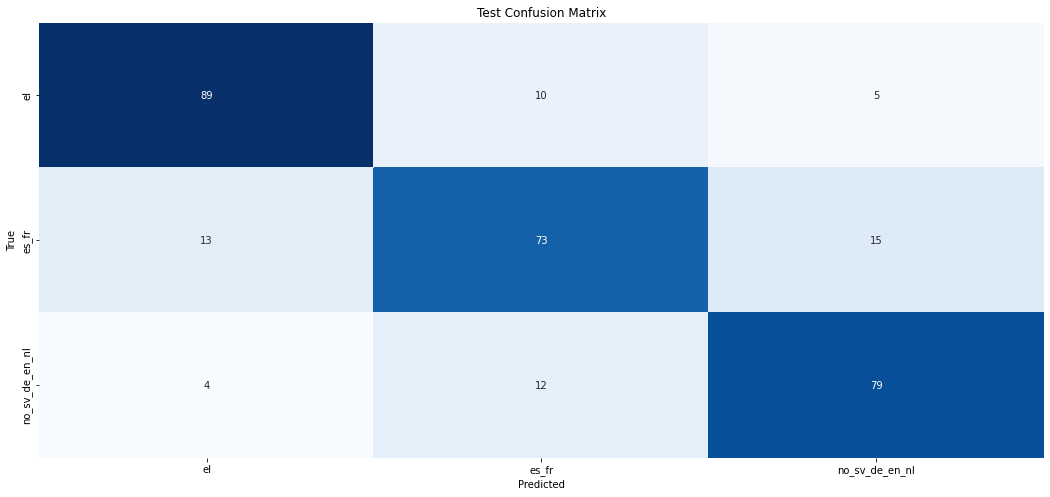

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_confu_matrix = confusion_matrix(y_test, predictions)
fault_type = ['el','es_fr','no_sv_de_en_nl']
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
